In [2]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
%matplotlib inline

In [3]:
endpoint_BTC = 'https://min-api.cryptocompare.com/data/histoday'
res_btc = requests.get(endpoint_BTC + '?fsym=BTC&tsym=USD&limit=2000')
df_BTC = pd.DataFrame(json.loads(res_btc.content)['Data'])
df_BTC = df_BTC.set_index('time')
df_BTC.index = pd.to_datetime(df_BTC.index, unit='s')
target_col_BTC='close'

In [4]:
df_BTC

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2018-03-02,11191.94,10801.45,10929.37,77195.49,8.529085e+08,11043.12,direct,
2018-03-03,11530.66,11043.12,11043.12,71279.36,8.122001e+08,11465.36,direct,
2018-03-04,11539.79,11084.01,11465.36,61016.39,6.907273e+08,11504.42,direct,
2018-03-05,11694.15,11431.55,11503.94,68323.51,7.914719e+08,11440.73,direct,
2018-03-06,11441.65,10589.28,11440.33,109876.55,1.210081e+09,10735.45,direct,
...,...,...,...,...,...,...,...,...
2023-08-19,26262.71,25796.79,26049.84,10190.59,2.651585e+08,26095.78,direct,
2023-08-20,26290.52,25989.55,26095.78,7358.36,1.922638e+08,26191.28,direct,
2023-08-21,26246.12,25822.32,26191.28,16512.38,4.300156e+08,26125.92,direct,


In [5]:
df_BTC = df_BTC.drop(['conversionType','conversionSymbol'], axis=1)
df_BTC

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2018-03-02,11191.94,10801.45,10929.37,77195.49,8.529085e+08,11043.12
2018-03-03,11530.66,11043.12,11043.12,71279.36,8.122001e+08,11465.36
2018-03-04,11539.79,11084.01,11465.36,61016.39,6.907273e+08,11504.42
2018-03-05,11694.15,11431.55,11503.94,68323.51,7.914719e+08,11440.73
2018-03-06,11441.65,10589.28,11440.33,109876.55,1.210081e+09,10735.45
...,...,...,...,...,...,...
2023-08-19,26262.71,25796.79,26049.84,10190.59,2.651585e+08,26095.78
2023-08-20,26290.52,25989.55,26095.78,7358.36,1.922638e+08,26191.28
2023-08-21,26246.12,25822.32,26191.28,16512.38,4.300156e+08,26125.92


In [6]:
endpoint_ETH = 'https://min-api.cryptocompare.com/data/histoday'
res_ETH = requests.get(endpoint_ETH + '?fsym=ETH&tsym=USD&limit=2000')
df_ETH = pd.DataFrame(json.loads(res_ETH.content)['Data'])
df_ETH = df_ETH.set_index('time')
df_ETH.index = pd.to_datetime(df_ETH.index, unit='s')
target_col_ETH='close'

In [7]:
df_ETH

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2018-03-02,881.35,853.30,871.73,465100.32,3.986173e+08,857.06,multiply,BTC
2018-03-03,890.74,855.89,857.06,447097.83,3.826662e+08,855.89,multiply,BTC
2018-03-04,891.25,858.34,855.89,384392.02,3.333460e+08,867.20,multiply,BTC
2018-03-05,865.15,838.49,867.17,424359.91,3.588321e+08,845.58,multiply,BTC
2018-03-06,819.97,789.70,845.21,482448.32,3.932642e+08,815.14,multiply,BTC
...,...,...,...,...,...,...,...,...
2023-08-19,1695.24,1653.99,1661.06,85394.75,1.426355e+08,1669.67,direct,
2023-08-20,1693.96,1662.12,1669.67,77051.86,1.290590e+08,1685.38,direct,
2023-08-21,1687.71,1649.35,1685.38,133136.43,2.223328e+08,1667.27,direct,


In [8]:
df_ETH = df_ETH.drop(['conversionType','conversionSymbol'], axis=1)
df_ETH

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2018-03-02,881.35,853.30,871.73,465100.32,3.986173e+08,857.06
2018-03-03,890.74,855.89,857.06,447097.83,3.826662e+08,855.89
2018-03-04,891.25,858.34,855.89,384392.02,3.333460e+08,867.20
2018-03-05,865.15,838.49,867.17,424359.91,3.588321e+08,845.58
2018-03-06,819.97,789.70,845.21,482448.32,3.932642e+08,815.14
...,...,...,...,...,...,...
2023-08-19,1695.24,1653.99,1661.06,85394.75,1.426355e+08,1669.67
2023-08-20,1693.96,1662.12,1669.67,77051.86,1.290590e+08,1685.38
2023-08-21,1687.71,1649.35,1685.38,133136.43,2.223328e+08,1667.27


In [9]:
endpoint_DOGE = 'https://min-api.cryptocompare.com/data/histoday'
res_DOGE = requests.get(endpoint_DOGE + '?fsym=DOGE&tsym=USD&limit=900')
df_DOGE = pd.DataFrame(json.loads(res_DOGE.content)['Data'])
df_DOGE = df_DOGE.set_index('time')
df_DOGE.index = pd.to_datetime(df_DOGE.index, unit='s')
target_col_DOGE='close'

In [10]:
df_DOGE

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2021-03-06,0.05257,0.04920,0.04963,2.681718e+08,13707677.34,0.05110,direct,
2021-03-07,0.05237,0.05052,0.05110,1.390640e+08,7147365.42,0.05210,direct,
2021-03-08,0.06325,0.05161,0.05210,8.034260e+08,45579884.26,0.06316,direct,
2021-03-09,0.06316,0.05597,0.06316,4.617440e+08,27086967.68,0.05805,direct,
2021-03-10,0.05876,0.05462,0.05805,2.516365e+08,14147262.08,0.05593,direct,
...,...,...,...,...,...,...,...,...
2023-08-19,0.06447,0.06310,0.06324,1.222682e+08,7777608.46,0.06380,direct,
2023-08-20,0.06468,0.06338,0.06380,1.058250e+08,6774828.80,0.06384,direct,
2023-08-21,0.06410,0.06049,0.06384,1.952295e+08,12186408.96,0.06251,direct,


In [11]:
df_DOGE = df_DOGE.drop(['conversionType','conversionSymbol'], axis=1)
df_DOGE

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2021-03-06,0.05257,0.04920,0.04963,2.681718e+08,13707677.34,0.05110
2021-03-07,0.05237,0.05052,0.05110,1.390640e+08,7147365.42,0.05210
2021-03-08,0.06325,0.05161,0.05210,8.034260e+08,45579884.26,0.06316
2021-03-09,0.06316,0.05597,0.06316,4.617440e+08,27086967.68,0.05805
2021-03-10,0.05876,0.05462,0.05805,2.516365e+08,14147262.08,0.05593
...,...,...,...,...,...,...
2023-08-19,0.06447,0.06310,0.06324,1.222682e+08,7777608.46,0.06380
2023-08-20,0.06468,0.06338,0.06380,1.058250e+08,6774828.80,0.06384
2023-08-21,0.06410,0.06049,0.06384,1.952295e+08,12186408.96,0.06251


In [12]:
def train_test_split(df, test_size=0.2, valid_size=0.4):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [13]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [14]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [15]:
def prepare_data(df, target_col, window_len=5, zero_base=True, test_size=0.4):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

In [16]:
train_BTC, test_BTC = train_test_split(df_BTC,test_size=0.4)
train_ETH, test_ETH = train_test_split(df_ETH,test_size=0.4)
train_DOGE, test_DOGE = train_test_split(df_DOGE,test_size=0.4)

In [17]:
print(train_BTC)
print(test_BTC)

                high       low      open  volumefrom      volumeto     close
time                                                                        
2018-03-02  11191.94  10801.45  10929.37    77195.49  8.529085e+08  11043.12
2018-03-03  11530.66  11043.12  11043.12    71279.36  8.122001e+08  11465.36
2018-03-04  11539.79  11084.01  11465.36    61016.39  6.907273e+08  11504.42
2018-03-05  11694.15  11431.55  11503.94    68323.51  7.914719e+08  11440.73
2018-03-06  11441.65  10589.28  11440.33   109876.55  1.210081e+09  10735.45
...              ...       ...       ...         ...           ...       ...
2021-06-10  38387.20  35821.05  37391.58    63052.49  2.338112e+09  36680.78
2021-06-11  37665.85  35981.84  36680.78    43119.67  1.596039e+09  37339.98
2021-06-12  37445.32  34655.21  37339.98    40619.14  1.450138e+09  35541.78
2021-06-13  39374.68  34802.24  35541.78    46353.98  1.727292e+09  39017.37
2021-06-14  41025.42  38755.79  39017.37    68729.09  2.740590e+09  40526.63

In [18]:
model_btc = keras.models.load_model('BTCmodel.hdf5')
model_eth = keras.models.load_model('ETHmodel.hdf5')
model_doge = keras.models.load_model('DOGEmodel.hdf5')

In [19]:
window_len = 5
zero_base = True
test_size = 0.4

In [20]:
train_BTC, test_BTC, X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC = prepare_data(df_BTC, target_col_BTC, window_len=window_len, zero_base=zero_base, test_size=test_size)
train_ETH, test_ETH, X_train_ETH, X_test_ETH, y_train_ETH, y_test_ETH = prepare_data(df_ETH, target_col_ETH, window_len=window_len, zero_base=zero_base, test_size=test_size)
train_DOGE, test_DOGE, X_train_DOGE, X_test_DOGE, y_train_DOGE, y_test_DOGE = prepare_data(df_DOGE, target_col_DOGE, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [21]:
# targets_BTC = test_BTC[target_col_BTC][window_len:]
preds_BTC = model_btc.predict(X_test_BTC).squeeze()
mean_absolute_error(preds_BTC, y_test_BTC)

25/25 [==============================] - 1s 2ms/step


0.023972718604374034

In [22]:
preds_ETH = model_btc.predict(X_test_ETH).squeeze()
mean_absolute_error(preds_ETH, y_test_ETH)

25/25 [==============================] - 0s 2ms/step


0.03015443661448764

In [23]:
preds_DOGE = model_btc.predict(X_test_DOGE).squeeze()
mean_absolute_error(preds_DOGE, y_test_DOGE)

12/12 [==============================] - 0s 3ms/step


0.03213454379300341

In [24]:
def line_plot(line2, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    # ax.plot(line1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [CAD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

In [26]:
# def line_plot_btc(preds_BTC):
targets_BTC = test_BTC[target_col_BTC][window_len:]
preds_BTC = test_BTC[target_col_BTC].values[:-window_len] * (preds_BTC + 1)
preds_BTC = pd.Series(index=targets_BTC.index, data=preds_BTC)

targets_ETH = test_ETH[target_col_ETH][window_len:]
preds_ETH = test_BTC[target_col_ETH].values[:-window_len] * (preds_ETH + 1)
preds_ETH = pd.Series(index=targets_ETH.index, data=preds_ETH)

targets_DOGE = test_DOGE[target_col_DOGE][window_len:]
preds_DOGE = test_DOGE[target_col_DOGE].values[:-window_len] * (preds_DOGE + 1)
preds_DOGE = pd.Series(index=targets_DOGE.index, data=preds_DOGE)
# line_plot(preds_BTC, 'Closing Price', lw = 3)

In [26]:
# line_plot_btc(preds_BTC)

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_692\183577376.py", line 30, in <lambda>
    button1 = Button(window, text = "press me for Bitcoin", command=lambda: plotting(preds_BTC, "Closing Price", lw =3), height = 2, width = 20)
  File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_692\183577376.py", line 19, in plotting
    toolbar = NavigationToolbar2Tk(canvas)
TypeError: __init__() missing 1 required positional argument: 'window'
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_692\183577376.py", line 31, in <lambda>
    button2 = Button(window, text = "press me for Eterium", command=lambda: plotting(preds_ETH, "Closing Price", lw =3),

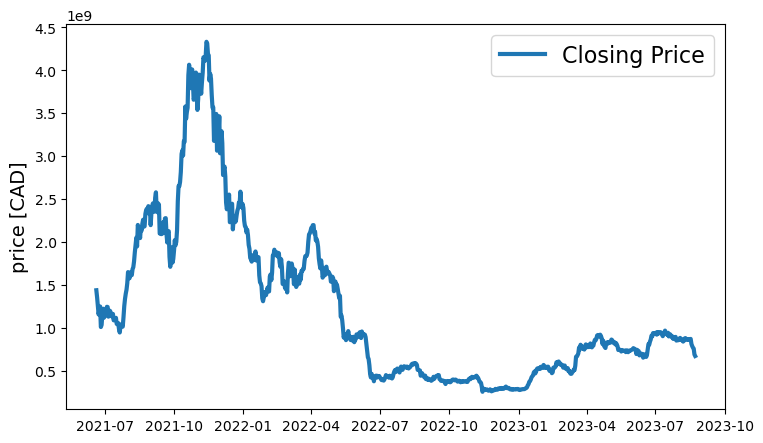

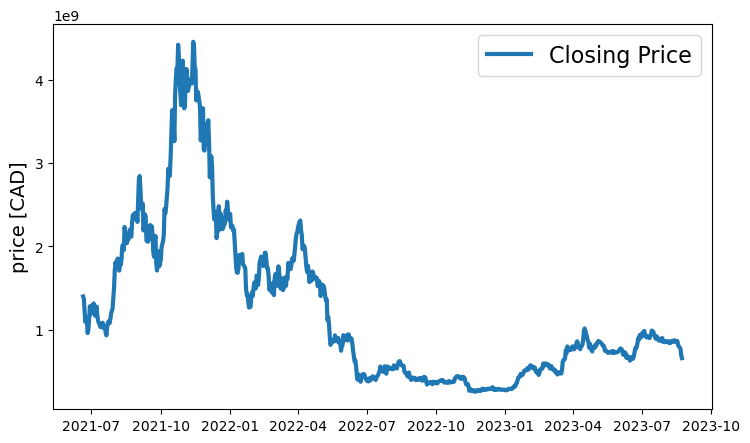

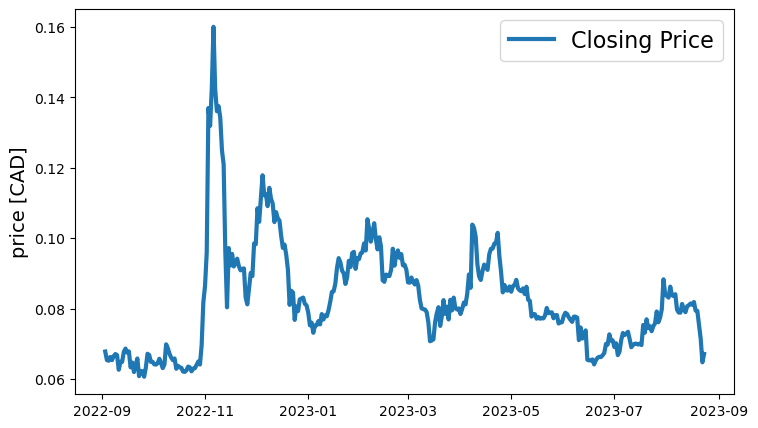

In [27]:
from matplotlib.figure import Figure
from tkinter import *
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)

def plotting(line2, label2=None, title='', lw=2):
    win = Tk()
    win.geometry("850x500")

    fig, ax = plt.subplots(1, figsize=(13, 7))
    # ax.plot(line1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [CAD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

    canvas = FigureCanvasTkAgg(fig, master = win) 
    canvas.draw()
    canvas.get_tk_widget().pack()
    toolbar = NavigationToolbar2Tk(canvas)
    toolbar.update()
    canvas.get_tk_widget().pack()

    win.mainloop()



# fig = Figure(figsize=(6, 6))
window = Tk()
# box = Entry(window)
button1 = Button(window, text = "press me for Bitcoin", command=lambda: plotting(preds_BTC, "Closing Price", lw =3), height = 2, width = 20)
button2 = Button(window, text = "press me for Eterium", command=lambda: plotting(preds_ETH, "Closing Price", lw =3), height = 2, width = 20)
button3 = Button(window, text = "press me for DogeCoin", command=lambda: plotting(preds_DOGE, "Closing Price", lw =3), height = 2, width = 20)
# box.pack()
button1.pack()
button2.pack()
button3.pack()
window.mainloop()
